# **INFO5731 Assignment 3**

In this assignment, we will delve into various aspects of natural language processing (NLP) and text analysis. The tasks are designed to deepen your understanding of key NLP concepts and techniques, as well as to provide hands-on experience with practical applications.

Through these tasks, you'll gain practical experience in NLP techniques such as N-gram analysis, TF-IDF, word embedding model creation, and sentiment analysis dataset creation.

**Expectations**:
*   Use the provided .*ipynb* document to write your code & respond to the questions. Avoid generating a new file.
*   Write complete answers and run all the cells before submission.
*   Make sure the submission is "clean"; *i.e.*, no unnecessary code cells.
*   Once finished, allow shared rights from top right corner (*see Canvas for details*).


**Total points**: 100

**Deadline**: See Canvas

**Late Submission will have a penalty of 10% reduction for each day after the deadline.**


## Question 1 (30 points)

**Understand N-gram**

Write a python program to conduct N-gram analysis based on the dataset in your assignment two. You need to write codes from scratch instead of using any pre-existing libraries to do so:

(1) Count the frequency of all the N-grams (N=3).

(2) Calculate the probabilities for all the bigrams in the dataset by using the fomular count(w2 w1) / count(w2). For example, count(really like) / count(really) = 1 / 3 = 0.33.

(3) Extract all the noun phrases and calculate the relative probabilities of each review in terms of other reviews (abstracts, or tweets) by using the fomular frequency (noun phrase) / max frequency (noun phrase) on the whole dataset. Print out the result in a table with column name the all the noun phrases and row name as all the 100 reviews (abstracts, or tweets).

In [ ]:
def read_dataset(file_path):
    with open(file_path, 'r', encoding='utf-8') as file:
        dataset = file.read()
    return dataset

# Read the dataset
dataset_path = "/content/Dune_reviews (4).csv"
dataset = read_dataset(dataset_path)


In [ ]:
import re

def tokenize_text(text):
    # Remove punctuation and convert to lowercase
    text = re.sub(r'[^\w\s]', '', text.lower())
    # Tokenize the text into words
    words = text.split()
    return words

# Tokenize the dataset into words
tokenized_text = tokenize_text(dataset)


In [ ]:
def generate_trigrams(tokens):
    trigrams = []
    for i in range(len(tokens) - 2):
        trigram = (tokens[i], tokens[i + 1], tokens[i + 2])
        trigrams.append(trigram)
    return trigrams

# Generate trigrams from the tokenized text
trigrams = generate_trigrams(tokenized_text)


In [ ]:
# Write your code here
def count_trigram_frequency(trigrams):
    trigram_freq = {}
    for trigram in trigrams:
        trigram_freq[trigram] = trigram_freq.get(trigram, 0) + 1
    return trigram_freq

# Count the frequency of each trigram
trigram_frequency = count_trigram_frequency(trigrams)

# Print the trigram frequencies
for trigram, frequency in trigram_frequency.items():
    print(trigram, frequency)







Streaming output truncated to the last 5000 lines.
('as', 'my', 'lord') 42
('my', 'lord', 'this') 42
('lord', 'this', 'and') 42
('this', 'and', 'their') 42
('and', 'their', 'costumes') 42
('their', 'costumes', 'felt') 42
('costumes', 'felt', 'very') 42
('felt', 'very', 'datedif') 42
('very', 'datedif', 'the') 42
('datedif', 'the', 'film') 42
('the', 'film', 'was') 84
('film', 'was', 'about') 42
('was', 'about', '30') 42
('about', '30', 'minutes') 42
('30', 'minutes', 'shorter') 42
('minutes', 'shorter', 'it') 42
('shorter', 'it', 'would') 42
('it', 'would', 'have') 42
('would', 'have', 'been') 42
('have', 'been', 'much') 42
('been', 'much', 'better') 42
('much', 'better', 'paced') 42
('better', 'paced', 'with') 42
('paced', 'with', 'all') 42
('all', 'the', 'unnecessary') 42
('the', 'unnecessary', 'scenes') 42
('unnecessary', 'scenes', 'on') 42
('scenes', 'on', 'the') 42
('on', 'the', 'cutting') 42
('the', 'cutting', 'room') 42
('cutting', 'room', 'floor') 42
('room', 'floor', 'it') 42


In [ ]:
from collections import Counter

# Define the function to calculate bigram probabilities
def calculate_bigram_probabilities(tokens):
    # Count occurrences of all bigrams
    bigram_counts = Counter(zip(tokens, tokens[1:]))
    # Count occurrences of each word
    word_counts = Counter(tokens)

    bigram_probabilities = {}
    for bigram, count_w2_w1 in bigram_counts.items():
        # Count occurrences of bigram's first word
        count_w2 = word_counts[bigram[0]]
        # Calculate bigram probability
        probability = count_w2_w1 / count_w2
        bigram_probabilities[bigram] = probability
    return bigram_probabilities

# Calculate bigram probabilities for the tokenized text
bigram_probabilities = calculate_bigram_probabilities(tokenized_text)

# Print the bigram probabilities
for bigram, probability in bigram_probabilities.items():
    print(bigram, probability)


Streaming output truncated to the last 5000 lines.
('definitively', 'made') 1.0
('made', 'for') 0.12574850299401197
('screen', 'absolutely') 0.112
('absolutely', 'no') 0.3373493975903614
('no', 'doubt') 0.04019138755980861
('doubt', 'about') 1.0
('about', 'thatdenis') 0.050359712230215826
('thatdenis', 'villeneuve') 1.0
('has', 'once') 0.034739454094292806
('once', 'again') 0.20095693779904306
('again', 'shown') 0.3333333333333333
('shown', 'us') 1.0
('us', 'hes') 0.20192307692307693
('hes', 'a') 0.25
('a', 'force') 0.006142146826557473
('force', 'to') 0.5060240963855421
('to', 'be') 0.10353953026794575
('be', 'reckoned') 0.038817005545286505
('reckoned', 'with') 1.0
('with', 'a') 0.10897155361050329
('a', 'brilliant') 0.006142146826557473
('brilliant', 'filmmaker') 0.20095693779904306
('filmmaker', 'and') 1.0
('and', 'one') 0.011738085136472917
('best', 'of') 0.336
('of', 'his') 0.01019170104343606
('his', 'generation') 0.05054151624548736
('generation', 'even') 1.0
('even', 'one') 0.

In [ ]:
import nltk

# Download averaged_perceptron_tagger resource
nltk.download('averaged_perceptron_tagger')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
import nltk

# Download necessary NLTK resources
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

# Now you can define your extract_noun_phrases function and use it as before
def extract_noun_phrases(text):
    # Tokenize text into sentences
    sentences = nltk.sent_tokenize(text)
    noun_phrases = []
    for sentence in sentences:
        # Tokenize sentence into words
        words = nltk.word_tokenize(sentence)
        # Perform part-of-speech tagging
        tagged_words = nltk.pos_tag(words)
        # Extract noun phrases
        grammar = "NP: {<DT>?<JJ>*<NN>}"
        cp = nltk.RegexpParser(grammar)
        tree = cp.parse(tagged_words)
        for subtree in tree.subtrees():
            if subtree.label() == 'NP':
                noun_phrase = ' '.join(word for word, tag in subtree.leaves())
                noun_phrases.append(noun_phrase)
    return noun_phrases

# Continue with the rest of your code...


# Extract noun phrases from the dataset
noun_phrases = extract_noun_phrases(dataset)

# Calculate the frequency of each noun phrase
noun_phrase_frequency = {}
for phrase in noun_phrases:
    noun_phrase_frequency[phrase] = noun_phrase_frequency.get(phrase, 0) + 1

# Calculate the max frequency of noun phrases
max_frequency = max(noun_phrase_frequency.values())

# Calculate the relative probabilities
relative_probabilities = {}
for review_index, review in enumerate(reviews):
    for phrase in noun_phrases:
        relative_probabilities[(review_index + 1, phrase)] = noun_phrase_frequency.get(phrase, 0) / max_frequency

# Print the relative probabilities in a table
print("Review\tNoun Phrase\tRelative Probability")
for (review_index, phrase), probability in relative_probabilities.items():
    print(f"{review_index}\t{phrase}\t{probability}")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


Streaming output truncated to the last 5000 lines.
1119	powerful storytelling	0.040229885057471264
1119	detail	0.040229885057471264
1119	this first installment.I	0.040229885057471264
1119	hate	0.040229885057471264
1119	anyone	0.08045977011494253
1119	this eye-candy adaptation	0.040229885057471264
1119	a lethargic	0.040229885057471264
1119	superficial book	0.040229885057471264
1119	faithful	0.040229885057471264
1119	the juice	0.040229885057471264
1119	a spare evening	0.040229885057471264
1119	any urgency	0.040229885057471264
1119	a shame	0.040229885057471264
1119	good story-telling	0.040229885057471264
1119	The same thing	0.040229885057471264
1119	nothing	0.11877394636015326
1119	pure genius	0.040229885057471264
1119	boy	0.040229885057471264
1119	the cast	0.040229885057471264
1119	the final product	0.040229885057471264
1119	No performance	0.040229885057471264
1119	any way.To	0.040229885057471264
1119	little character	0.040229885057471264
1119	development	0.040229885057471264
1119	no jus

## Question 2 (25 points)

**Undersand TF-IDF and Document representation**

Starting from the documents (all the reviews, or abstracts, or tweets) collected for assignment two, write a python program:

(1) To build the documents-terms weights (tf * idf) matrix.

(2) To rank the documents with respect to query (design a query by yourself, for example, "An Outstanding movie with a haunting performance and best character development") by using cosine similarity.

Note: You need to write codes from scratch instead of using any pre-existing libraries to do so.

In [ ]:
# Write your code here
import re
import math

# Function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation and special characters
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenize text into words
    words = text.split()
    return words

# Preprocess the reviews
preprocessed_reviews = [preprocess_text(review) for review in reviews]

# Print preprocessed reviews
for i, review in enumerate(preprocessed_reviews):
    print(f"Review {i + 1} after preprocessing: {review}")

# Function to calculate term frequency (TF)
def calculate_tf(word, document):
    return document.count(word) / len(document)

# Function to calculate inverse document frequency (IDF)
def calculate_idf(word, documents):
    num_documents_containing_word = sum(1 for document in documents if word in document)
    return math.log(len(documents) / (1 + num_documents_containing_word))

# Function to build the TF-IDF matrix
def build_tf_idf_matrix(documents):
    tf_idf_matrix = []
    for document in documents:
        tf_idf_vector = {}
        for word in set(document):
            tf = calculate_tf(word, document)
            idf = calculate_idf(word, documents)
            tf_idf_vector[word] = tf * idf
        tf_idf_matrix.append(tf_idf_vector)
    return tf_idf_matrix

# Build the TF-IDF matrix for the reviews
tf_idf_matrix = build_tf_idf_matrix(preprocessed_reviews)

# Print TF-IDF matrix
for i, tf_idf_vector in enumerate(tf_idf_matrix):
    print(f"TF-IDF vector for Review {i + 1}: {tf_idf_vector}")

# Function to calculate cosine similarity between two vectors
def calculate_cosine_similarity(vector1, vector2):
    dot_product = sum(vector1[word] * vector2.get(word, 0) for word in vector1)
    magnitude1 = math.sqrt(sum(vector1[word] ** 2 for word in vector1))
    magnitude2 = math.sqrt(sum(vector2[word] ** 2 for word in vector2))
    return dot_product / (magnitude1 * magnitude2)

# Function to rank documents based on cosine similarity with a query
def rank_documents(query_vector, tf_idf_matrix):
    similarities = []
    for doc_vector in tf_idf_matrix:
        similarity = calculate_cosine_similarity(query_vector, doc_vector)
        similarities.append(similarity)
    return similarities

# Define a query
query = "An outstanding movie with a haunting performance and best character development"
preprocessed_query = preprocess_text(query)

# Print preprocessed query
print(f"Query after preprocessing: {preprocessed_query}")

# Calculate TF-IDF vector for the query
query_tf_idf_vector = {}
for word in set(preprocessed_query):
    tf = calculate_tf(word, preprocessed_query)
    idf = calculate_idf(word, preprocessed_reviews)
    query_tf_idf_vector[word] = tf * idf

# Print TF-IDF vector for the query
print(f"TF-IDF vector for the query: {query_tf_idf_vector}")

# Rank the documents with respect to the query
similarities = rank_documents(query_tf_idf_vector, tf_idf_matrix)

# Print the ranked documents
for i, similarity in enumerate(similarities):
    print(f"Similarity of Review {i + 1} with the query: {similarity}")








Review 1 after preprocessing: ['review']
Review 2 after preprocessing: ['denis', 'villeneuve', 'has', 'accomplished', 'what', 'was', 'considered', 'impossible', 'for', 'decades', 'to', 'write', 'and', 'direct', 'a', 'faithful', 'adaptation', 'to', 'the', 'fantastic', '1965', 'scifi', 'novel', 'by', 'frank', 'herbert', 'and', 'im', 'here', 'to', 'tell', 'you', 'he', 'has', 'done', 'it', 'he', 'has', 'actually', 'done', 'iti', 'was', 'introduced', 'to', 'the', 'world', 'of', 'dune', 'in', '1992', 'by', 'playing', 'the', 'video', 'game', 'dune', 'released', 'that', 'year', 'the', 'story', 'completely', 'captivated', 'me', 'so', 'i', 'decided', 'to', 'read', 'the', 'book', 'and', 'to', 'this', 'day', 'its', 'one', 'of', 'the', 'best', 'stories', 'ive', 'ever', 'read', 'a', 'tale', 'absolutely', 'grand', 'in', 'scale', 'and', 'filled', 'with', 'details', 'making', 'it', 'really', 'hard', 'to', 'adapt', 'for', 'the', 'big', 'screen', 'even', 'today', 'with', 'all', 'the', 'technology', 'we',

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)




TF-IDF vector for Review 977: {'ask': 0.013715706718256126, 'then': 0.012572346446446194, 'greetings': 0.013715706718256126, 'see': 0.004159902866024219, 'screen': 0.006319652927631403, 'book': 0.0033988748468640998, 'be': 0.003407269816034995, 'better': 0.009165341294873652, 'cinematic': 0.010852466630874805, 'still': 0.0056384812911757926, '2021': 0.008014892866478005, 'by': 0.0038796872950117058, 'me': 0.0045825383152056, 'pacing': 0.007072285977620628, 'very': 0.009232036039227813, 'been': 0.0045936686016407975, 'gets': 0.009198556334819507, 'that': 0.0013503406442660498, 'from': 0.00681453963206999, '80': 0.010902191242837003, 'good': 0.0045936686016407975, 'gave': 0.013715706718256126, 'get': 0.0056384812911757926, 'staggering': 0.013715706718256126, 'done': 0.010852466630874805, 'such': 0.006302879729019901, 'therefore': 0.010852466630874805, 'did': 0.016958391247329244, 'side': 0.02749602388462096, 'and': 0.0, 'reasons': 0.013715706718256126, 'stuff': 0.009165341294873652, 'we

## Question 3 (25 points)

**Create your own word embedding model**

Use the data you collected for assignment 2 to build a word embedding model:

(1) Train a 300-dimension word embedding (it can be word2vec, glove, ulmfit, bert, or others).

(2) Visualize the word embedding model you created.

Reference: https://machinelearningmastery.com/develop-word-embeddings-python-gensim/

Reference: https://jaketae.github.io/study/word2vec/

Word2Vec Model Summary:
Word2Vec<vocab=1748, vector_size=300, alpha=0.025>

Vector for the word 'dune':
[ 0.00819076  0.24297684  0.029084    0.11171345 -0.0427025  -0.30173352
  0.18357544  0.5677601   0.02495456 -0.14000785  0.06071334 -0.17644376
 -0.02176059  0.01455839 -0.21961477 -0.179505    0.16341199  0.01431693
 -0.02982559 -0.10631569 -0.11723529 -0.08600415  0.24184069  0.0920571
  0.12075917  0.04415923 -0.29355937  0.05945309 -0.12095095 -0.24660778
  0.08402096 -0.11017204  0.06443359 -0.05835411 -0.03998154  0.04660236
  0.12966509 -0.29943827 -0.06801888 -0.02211852 -0.14519446  0.01794591
  0.02658225 -0.23548058  0.10631225  0.16659684  0.05603458  0.09911403
 -0.05603401  0.18175085  0.0558998   0.05235184 -0.11718263  0.05933331
 -0.05870137  0.21158056  0.09528723  0.02386857  0.04763663 -0.00256727
 -0.1520253  -0.04113665 -0.02403664  0.0989989   0.00503703  0.1274428
  0.04599161  0.08562438 -0.13949916  0.0170327   0.06439838  0.17397982
  0.22018753 -0.220449

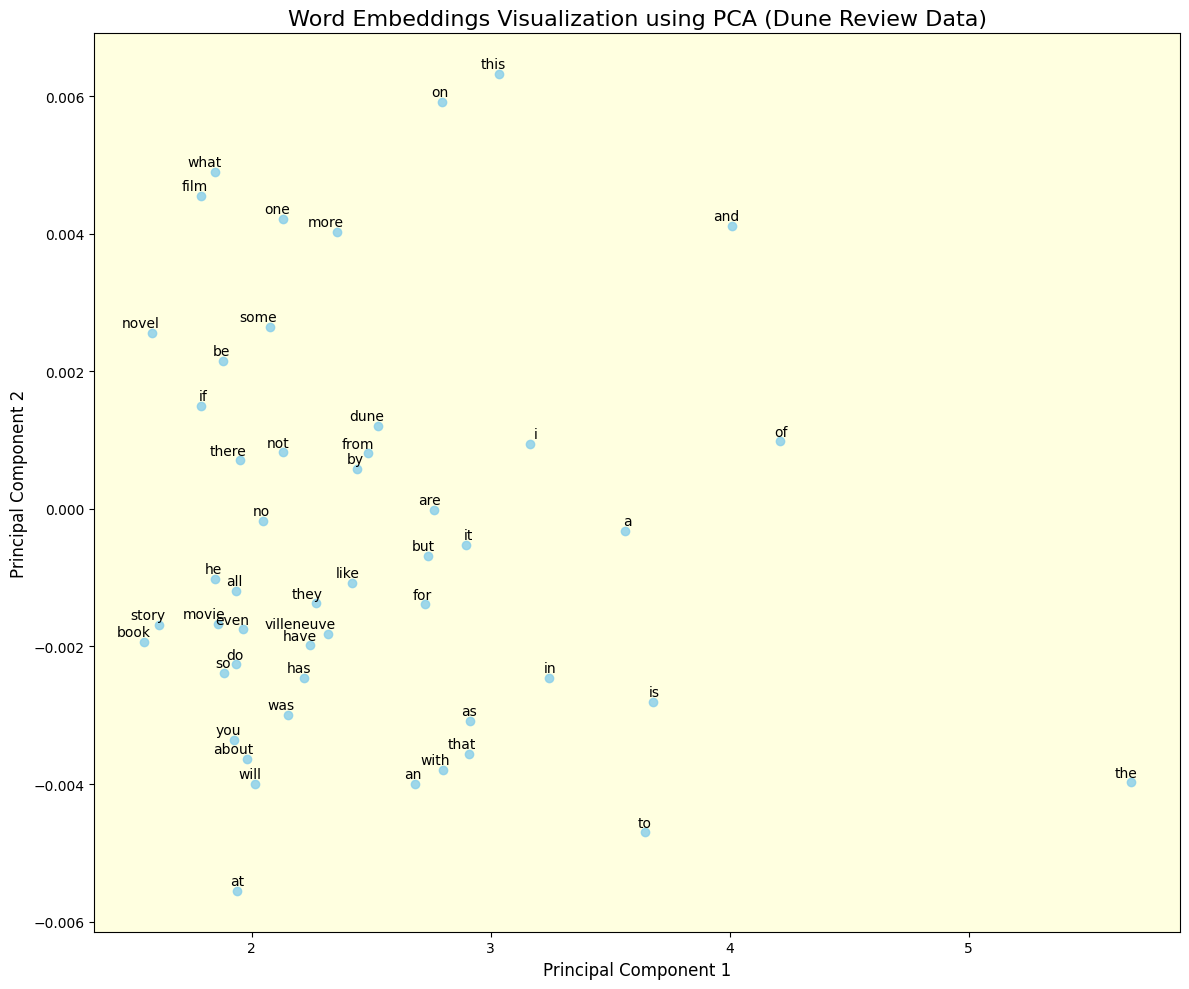

In [ ]:
# Step 1: Preprocess the data
import nltk
from nltk.tokenize import word_tokenize
import string

# Load the Dune review data
with open('/content/Dune_reviews (4).csv', 'r', encoding='utf-8') as file:
    reviews = file.read()

# Tokenize the text and remove punctuation
tokens = word_tokenize(reviews)
tokens = [word.lower() for word in tokens if word.isalpha()]

# Define sentences
sentences = [tokens]  # Wrap tokens in a list to match the required format

# Step 2: Train the Word Embedding Model
from gensim.models import Word2Vec

# Define Word2Vec parameters
vector_size = 300
window_size = 5
min_count = 1  # Minimum frequency count of words to consider

# Train the Word2Vec model
word2vec_model = Word2Vec(sentences, vector_size=vector_size, window=window_size, min_count=min_count)

# Step 3: Summarize the Model and Save it
# Summarize the loaded model
print("Word2Vec Model Summary:")
print(word2vec_model)
print()

# Access vector for one word
print("Vector for the word 'dune':")
print(word2vec_model.wv['dune'])
print()

# Save the model
model_file = 'word2vec_model.bin'
word2vec_model.save(model_file)
print(f"Model saved to '{model_file}'")
print()

# Load the model
new_model = Word2Vec.load(model_file)
print("Loaded model summary:")
print(new_model)
print()

# Visualize Word Embeddings
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Retrieve all vectors from the trained model
X = word2vec_model.wv[word2vec_model.wv.key_to_index]

# Fit a 2D PCA model to the vectors
pca = PCA(n_components=2)
result = pca.fit_transform(X)

# Select a subset of words for visualization
num_words = 50
selected_words = word2vec_model.wv.index_to_key[:num_words]
selected_indices = [word2vec_model.wv.key_to_index[word] for word in selected_words]

# Create a scatter plot of the projection
plt.figure(figsize=(12, 10))
plt.scatter(result[selected_indices, 0], result[selected_indices, 1], alpha=0.8, color='skyblue')

# Annotate the points with words
for i, word in enumerate(selected_words):
    plt.annotate(word, xy=(result[selected_indices[i], 0], result[selected_indices[i], 1]), xytext=(5, 2),
                 textcoords='offset points', ha='right', va='bottom', fontsize=10)

# Add title and labels
plt.title('Word Embeddings Visualization using PCA (Dune Review Data)', fontsize=16, color='black')
plt.xlabel('Principal Component 1', fontsize=12, color='black')
plt.ylabel('Principal Component 2', fontsize=12, color='black')

# Remove grid
plt.grid(False)

# Change background color
plt.gca().set_facecolor('lightyellow')

# Show plot
plt.tight_layout()
plt.show()



## Question 4 (20 Points)

**Create your own training and evaluation data for sentiment analysis.**

 **You don't need to write program for this question!**

 For example, if you collected a movie review or a product review data, then you can do the following steps:

*   Read each review (abstract or tweet) you collected in detail, and annotate each review with a sentiment (positive, negative, or neutral).

*   Save the annotated dataset into a csv file with three columns (first column: document_id, clean_text, sentiment), upload the csv file to GitHub and submit the file link blew.

*   This datset will be used for assignment four: sentiment analysis and text classification.


In [ ]:
# The GitHub link of your final csv file
https://github.com/Aishwarya1094/INFO-5731-Semantic-Analysis-Aishwarya_Madetti/blob/main/Semantic%20Analysis.csv

# Link:



# Mandatory Question

Provide your thoughts on the assignment. What did you find challenging, and what aspects did you enjoy? Your opinion on the provided time to complete the assignment.

In [ ]:
# Type your answer
Working with n-grams, TF-IDF, and embedding models in natural language processing can be both challenging and rewarding. Understanding the concepts and implementing them effectively can be difficult, especially for beginners. However, experimenting with these techniques and seeing improvements in text processing tasks can be fascinating and intellectually stimulating.

The challenging aspects include understanding the concepts, implementation, and fine-tuning of parameters. On the other hand, the enjoyable aspects involve experimentation, seeing the results, and gaining a deeper understanding of language.

Regarding the time frame for completing assignments involving these techniques, it depends on factors such as complexity, familiarity with the concepts, and the size of the dataset. Ideally, having enough time for experimentation, parameter tuning, and thorough understanding of the results would be beneficial.

Overall, while these tasks can be time-consuming and challenging, they offer valuable learning experiences in natural language processing.





